<a href="https://colab.research.google.com/github/ABHI91827/Electric-Vehicle-/blob/main/Electric_Vehicle_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data.csv


In [ ]:
original_data=pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [ ]:
original_data.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,0.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
2,JM3KKBHA9R,Kitsap,Kingston,WA,98346.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,23.0,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303509e+10
3,7SAYGDEE8P,Thurston,Olympia,WA,98501.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,35.0,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EB5K,Thurston,Rainier,WA,98576.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,20.0,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261698 entries, 0 to 261697
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         261698 non-null  object 
 1   County                                             261688 non-null  object 
 2   City                                               261688 non-null  object 
 3   State                                              261698 non-null  object 
 4   Postal Code                                        261688 non-null  float64
 5   Model Year                                         261698 non-null  int64  
 6   Make                                               261698 non-null  object 
 7   Model                                              261698 non-null  object 
 8   Electric Vehicle Type                              261698 non-null  object

In [ ]:
data=original_data.copy()

# **DATA CLEANING**

#  1.How many missing values exist in the dataset, and in which columns?

In [ ]:
data.isnull().sum()

,0
VIN (1-10),0
County,10
City,10
State,0
Postal Code,10
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


# **EXPLANATION**


*   COUNTRY HAS **10** MISSING VALUES
*   CITY HAS **10** MISSING VALUES
*   POSTAL CODE HAS **10** MISSING VALUES
*   ELECTRIC HAS **3** MISSING VALUES
*   BASE MSRP HAS **3** MISSING VALUES
*   LEGISLATIVE DISTRICT HAS **628** MISSING VALUES
*   VEHICLE LOCATION HAS **18** MISSING VALUES
*   ELECTRIC UTILITY HAS **10**  MISSING VALUES
*   2020 CENSUS TRACT HAS 1**0** MISSING VALUES

In [ ]:
data.dropna(axis=0, subset=['County'], inplace=True)

In [ ]:
data['County'].isnull().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


# 2.How should missing or zero values in the Base MSRP and Electric Range columns be handled?

In [ ]:
data['Electric Range']=data['Electric Range'].replace(0,np.nan)
data['Base MSRP']=data['Base MSRP'].replace(0,np.nan)
data['Electric Range']=data['Electric Range'].transform(lambda x: x.fillna(x.median()))
data['Base MSRP']=data['Base MSRP'].transform(lambda x: x.fillna(x.median()))

# EXPLANATION


*   Electric range and Base MSRP has the 0's and missing values
*   so basically this both columns are numeric values and they are often skewed
*   so i replaced them with median






In [ ]:
data['Vehicle Location'].isnull().sum()

np.int64(8)

In [ ]:
data.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
data['Vehicle Location'].fillna('Unknown', inplace=True)


In [ ]:
data.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
data['Legislative District'].unique()

array([15., 26., 23., 35., 20., 44., 38., 11., 48., 32., 46.,  1.,  2.,
       21., 39., 36., 14., 43., 45., 22., 34., 33., 41.,  5., 37., 16.,
       12., 10.,  3.,  6.,  9., 40.,  7., 13., 47., nan, 17., 24., 30.,
       31., 49., 18., 19., 28.,  8., 25., 42., 29., 27.,  4.])

In [ ]:

data['Legislative District'] = data.groupby('Vehicle Location')['Legislative District'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


In [ ]:
data.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


#  3.Are there duplicate records in the dataset? If so, how should they be managed?

In [ ]:
data.duplicated().sum()

np.int64(0)

*   There is no duplicates in records
*   if the duplicates are present in the record we can simple drop the duplicate values by the "drop_duplicates"





# 4.How can VINs be anonymized while maintaining uniqueness?

In [ ]:
import hashlib
data['VIN_anonymized']=data['VIN (1-10)'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest()[:8])



*  By using the hash fuction we can anonymized with uniqueness



# 5.How can Vehicle Location (GPS coordinates) be cleaned or converted for better readability?



*   Remove invalid 0/NaN coordinates; round for readability



# DATA EXPLORATION

# 1.What are the top 5 most common EV makes and models in the dataset?

In [ ]:
data.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,VIN_anonymized
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,59900.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10,bf018957
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,59900.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10,a720d326


In [ ]:
top_ev=data.groupby(['Make','Model'])['Electric Vehicle Type'].value_counts().sort_values(ascending=False).head(5)
print(top_ev)

Make       Model    Electric Vehicle Type         
TESLA      MODEL Y  Battery Electric Vehicle (BEV)    54717
           MODEL 3  Battery Electric Vehicle (BEV)    37772
NISSAN     LEAF     Battery Electric Vehicle (BEV)    13852
TESLA      MODEL S  Battery Electric Vehicle (BEV)     7945
CHEVROLET  BOLT EV  Battery Electric Vehicle (BEV)     7873
Name: count, dtype: int64


# INSIGHTS


*  The tesla has the most comman Ev
*  The Second is the Nissan
*  The third is the Chevrolet





# 2. What is the distribution of EVs by county? Which county has the most registrations?

In [ ]:
distribution_of_ev=data['County'].value_counts().head(5)
print(distribution_of_ev)


County
King         130129
Snohomish     32335
Pierce        21624
Clark         15925
Thurston       9506
Name: count, dtype: int64


# Insights


*   King Country has the highest registration



# 3. How has EV adoption changed over different model years?

In [ ]:
ev_adoption=data['Model Year'].value_counts().sort_index(ascending=False)
print(ev_adoption)


Model Year
2026     5448
2025    29495
2024    49869
2023    60214
2022    29645
2021    20934
2020    12395
2019    11043
2018    14522
2017     8766
2016     5253
2015     4574
2014     3326
2013     4081
2012     1440
2011      631
2010       22
2008       20
2003        1
2002        1
2000        8
Name: count, dtype: int64


# 4.What is the average electric range of EVs in the dataset?

In [ ]:
average_electric_range=data['Electric Range'].mean()
print(average_electric_range)

75.19885130384274


# 5.What percentage of EVs are eligible for Clean Alternative Fuel Vehicle (CAFV) incentives?

In [ ]:
percentage_of_ev=data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True)*100
print(percentage_of_ev)

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    61.478937
Clean Alternative Fuel Vehicle Eligible                         29.354422
Not eligible due to low battery range                            9.166641
Name: proportion, dtype: float64


# Insights


*   The Eligibility unknown as battery range has not been researched has the highest percentage of :  61.47
*   Not eligible due to low battery range has the least percentage of : 9.16



# 6.How does the electric range vary across different makes and models?

In [ ]:
electric_range_vary=data.groupby(['Model','Make'])['Electric Range'].median().sort_values(ascending=False)
print(electric_range_vary)

Model     Make         
ROADSTER  TESLA            245.0
BOLT EV   CHEVROLET        238.0
I-PACE    JAGUAR           234.0
MODEL S   TESLA            208.0
E-TRON    AUDI             204.0
                           ...  
C-CLASS   MERCEDES-BENZ      8.0
REVUELTO  LAMBORGHINI        6.0
PRIUS     TOYOTA             6.0
AMG GT    MERCEDES-BENZ      1.0
SL-CLASS  MERCEDES-BENZ      1.0
Name: Electric Range, Length: 181, dtype: float64


#  7.What is the average Base MSRP for each EV model?

In [ ]:
average_base_msrp=data.groupby('Model')['Base MSRP'].mean().sort_values(ascending=False)
print(average_base_msrp)

Model
918           845000.000000
ROADSTER      104811.458333
KARMA         102000.000000
740E           90287.037037
CT6            75095.000000
                  ...      
330E           54637.898687
COUNTRYMAN     50153.148615
CROSSTREK      42413.510638
SOUL           33473.043478
WHEEGO         32995.000000
Name: Base MSRP, Length: 181, dtype: float64


In [ ]:
data.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,VIN_anonymized
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,59900.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10,bf018957
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,59900.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10,a720d326


# **DATA VISUALIZATION**

# 1.Create a bar chart showing the top 5 EV makes and models by count.

Make       Model    Electric Vehicle Type         
TESLA      MODEL Y  Battery Electric Vehicle (BEV)    54717
           MODEL 3  Battery Electric Vehicle (BEV)    37772
NISSAN     LEAF     Battery Electric Vehicle (BEV)    13852
TESLA      MODEL S  Battery Electric Vehicle (BEV)     7945
CHEVROLET  BOLT EV  Battery Electric Vehicle (BEV)     7873
Name: count, dtype: int64


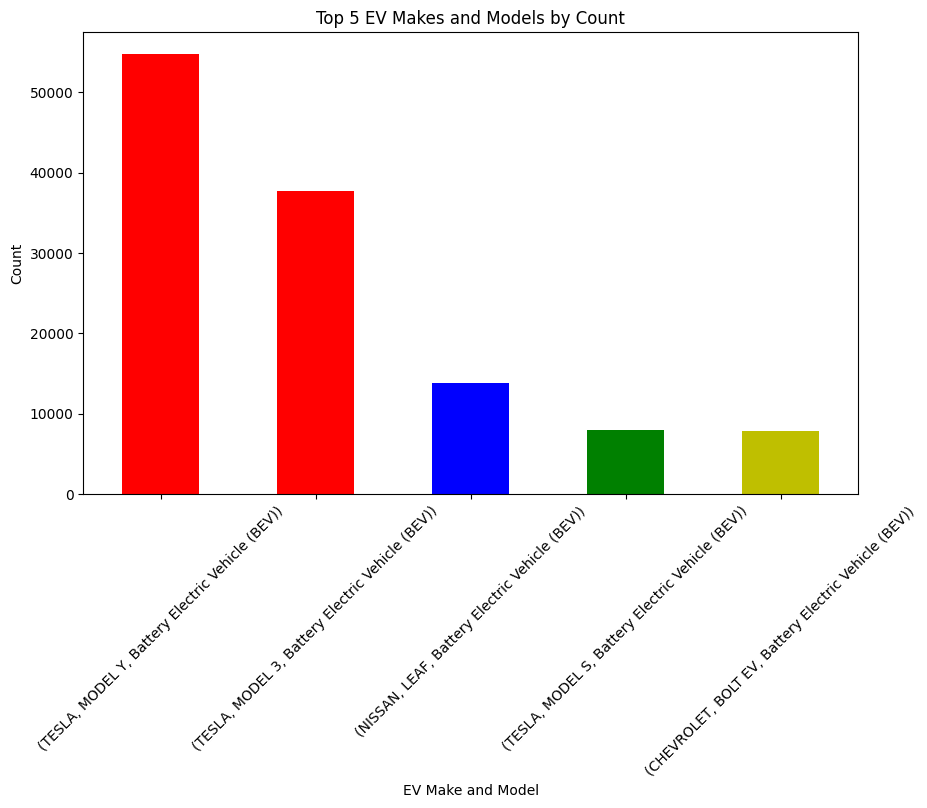

In [ ]:
top_ev=data.groupby(['Make','Model'])['Electric Vehicle Type'].value_counts().sort_values(ascending=False).head(5)
print(top_ev)
plt.figure(figsize=(10,6))
top_ev.plot(kind='bar',color=['r','r','b','g','y'])
plt.title('Top 5 EV Makes and Models by Count')
plt.xlabel('EV Make and Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2.Use a heatmap or choropleth map to visualize EV distribution by county.

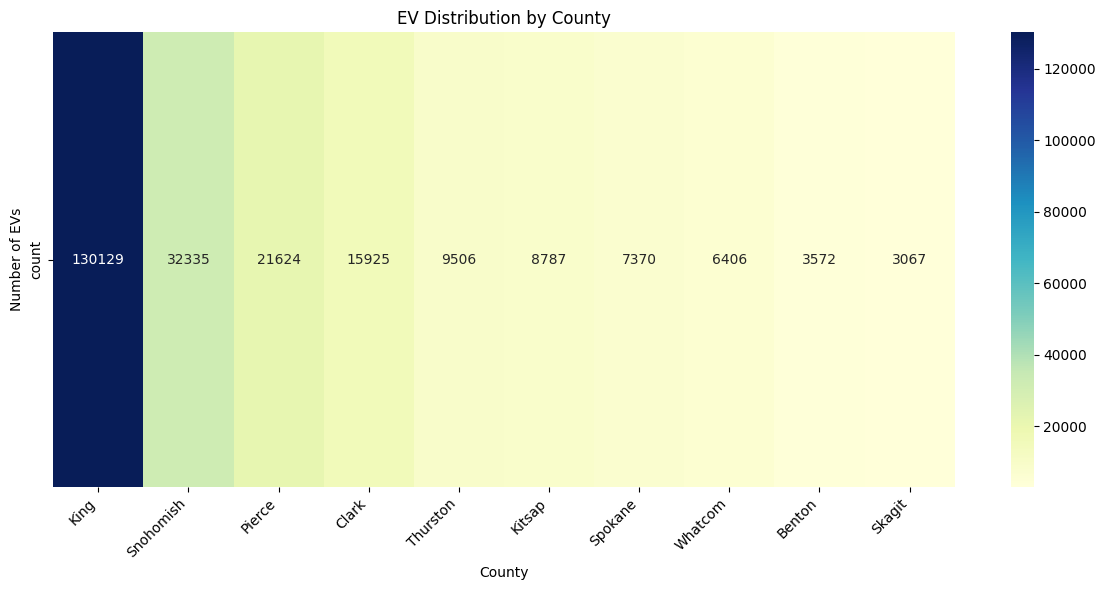

In [ ]:
ev_distribution_by_county=data['County'].value_counts().head(10)
plt.figure(figsize=(12, 6))
heatmap_data=ev_distribution_by_county.to_frame().T
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('EV Distribution by County')
plt.xlabel('County')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Create a line graph showing the trend of EV adoption by model year.

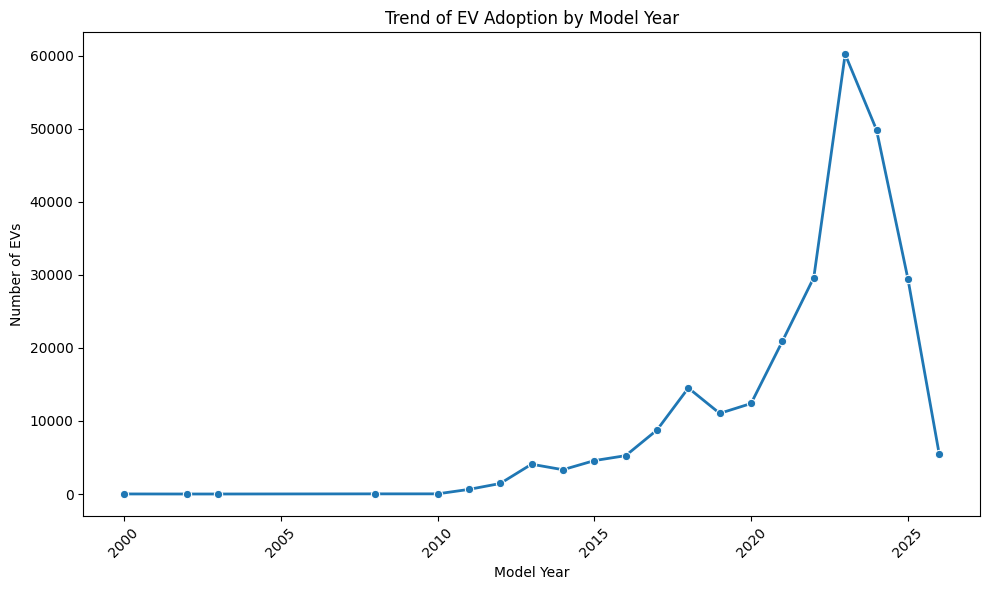

In [ ]:
ev_adoption_by_model_year=data.groupby('Model Year')['Electric Vehicle Type'].count().reset_index(name='EV_Count')
plt.figure(figsize=(10, 6))
sns.lineplot(data=ev_adoption_by_model_year, x="Model Year", y="EV_Count", marker="o", linewidth=2)
plt.title('Trend of EV Adoption by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4.Generate a scatter plot comparing electric range vs. base MSRP to see pricing trends.

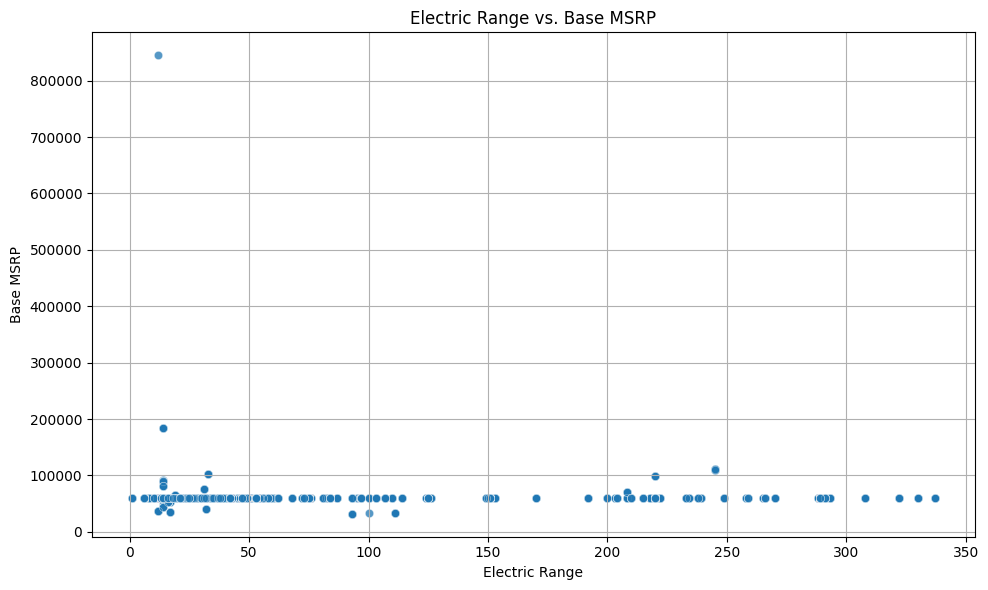

In [ ]:
electric_range_vs_base_msrp=data[['Electric Range','Base MSRP']]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=electric_range_vs_base_msrp, x='Electric Range', y='Base MSRP', alpha=0.5)
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.grid(True)
plt.tight_layout()

# 5.Plot a pie chart showing the proportion of CAFV-eligible vs. non-eligible EVs.

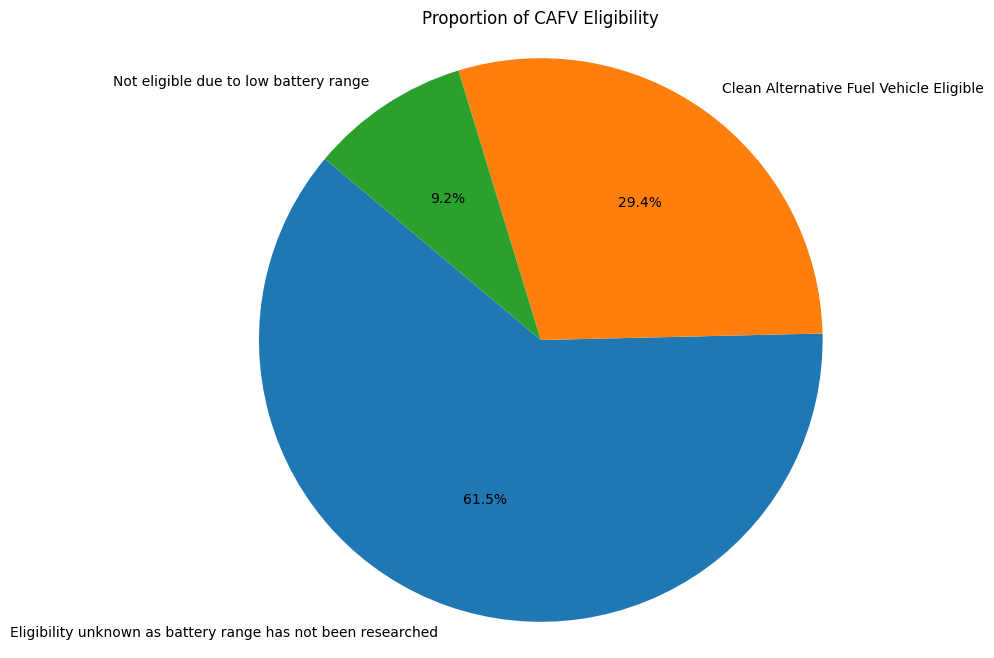

In [ ]:
cafv_eligibility_counts = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cafv_eligibility_counts, labels=cafv_eligibility_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of CAFV Eligibility')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,VIN_anonymized
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,59900.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10,bf018957
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,59900.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10,a720d326


In [ ]:
predict_data=data.copy()

In [ ]:
predict_data.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,VIN_anonymized
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,59900.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10,bf018957
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,59900.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10,a720d326


In [ ]:
predict_data.drop('VIN_anonymized',axis=1,inplace=True)

In [ ]:
predict_data.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,59900.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,59900.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le=LabelEncoder()
cols_to_encode = ['VIN (1-10)','Make','Model','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Legislative District','Vehicle Location','Electric Utility']
for col in cols_to_encode:
    predict_data[col]=le.fit_transform(predict_data[col].astype(str))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
colss_to_encode=['Postal Code','Base MSRP','DOL Vehicle ID','2020 Census Tract']
for col in colss_to_encode:
    predict_data[col]=sc.fit_transform(predict_data[col].values.reshape(-1, 1))

In [ ]:
# Columns for one-hot encoding
cols_for_onehot_encoding = ['County','City','State']

# Apply one-hot encoding
dummies = pd.get_dummies(predict_data[cols_for_onehot_encoding], drop_first=True)

# Concatenate the one-hot encoded columns with the rest of the DataFrame
predict_data = pd.concat([predict_data.drop(cols_for_onehot_encoding, axis=1), dummies], axis=1)

# The 'Model Year' column should be treated as a numerical feature, not one-hot encoded
# If it was intended to be dropped or transformed differently, that should be done in a separate step.

In [ ]:
x=predict_data.drop(['Electric Range','VIN (1-10)'],axis=1)
y=predict_data['Electric Range']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print("Mean_squared_error",mean_squared_error(y_test,y_pred))
print("r2_score",r2_score(y_test,y_pred))

Mean_squared_error 28360.52847579111
r2_score -5.275368833153055


In [ ]:
print(y_pred)

[ 51.52995886  66.83027678  45.17789035 ...  56.61630338  59.16541969
 149.16426238]


In [ ]:

X_test_reset = x_test.reset_index(drop=True)
y_test_reset = pd.DataFrame(y_test).reset_index(drop=True)
y_pred_reset = pd.DataFrame(y_pred, columns=['Predicted_Electric_Range'])


final = pd.concat([ y_test_reset, y_pred_reset], axis=1)



print(final)

       Electric Range  Predicted_Electric_Range
0                53.0                 51.529959
1                53.0                 66.830277
2                53.0                 45.177890
3                84.0                178.048334
4               238.0                136.029279
...               ...                       ...
52333            53.0                 68.508128
52334            53.0                 64.543352
52335            53.0                 56.616303
52336            53.0                 59.165420
52337           291.0                149.164262

[52338 rows x 2 columns]


In [ ]:
final.to_csv('ev_range_predicted.csv',index=False)

# **Linear Regression Model Questions:**

# 1.How can we use Linear Regression to predict the Electric Range of a vehicle?



*   we use linear regression model to predict the Electriv Range Of a vehicle
*   By divinding the given data set into independent and dependent variable to predict


*   Collect EV dataset (e.g., from Kaggle, EPA, or manufacturer data).

Select features (inputs) such as battery size, vehicle weight, motor power, MSRP, etc.

The target (output) variable = Electric Range.

Fit a Linear Regression model:

𝐸
𝑙
𝑒
𝑐
𝑡
𝑟
𝑖
𝑐
𝑅
𝑎
𝑛
𝑔
𝑒
=
𝑏
0
+
𝑏
1
×
𝐵
𝑎
𝑡
𝑡
𝑒
𝑟
𝑦
𝑆
𝑖
𝑧
𝑒
+
𝑏
2
×
𝑀
𝑜
𝑡
𝑜
𝑟
𝑃
𝑜
𝑤
𝑒
𝑟
+
𝑏
3
×
𝑀
𝑆
𝑅
𝑃
+
.
.
.
ElectricRange=b
0
	​

+b
1
	​

×BatterySize+b
2
	​

×MotorPower+b
3
	​

×MSRP+...

Train the model on existing EVs → test on unseen EVs to predict new ones
  




# 2. What independent variables (features) can be used to predict Electric Range? (e.g., Model Year, Base MSRP, Make)



*   Independent variable are

  VIN (1-10), County, City, State,	Postal Code,	Model Year,	Make,	Model,	Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,	Base MSRP,	Legislative District,	DOL Vehicle ID,	Vehicle Location,	Electric Utility,	2020 Census Tract







# 3.How do we handle categorical variables like Make and Model in regression analysis?



*  One-Hot Encoding	For non-ordered data

*  Label Encoding	For ordinal data







# 4. What is the R² score of the model, and what does it indicate?

R² (R-squared) measures how well the model fits the data.

𝑅
2
=
1
−
Sum of Squared Errors
Total Sum of Squares
R
2
=1−
Total Sum of Squares
Sum of Squared Errors
	​


# 5. How does the Base MSRP influence the Electric Range according to the regression model?

# After predicting

print(model.coef_)

print(model.intercept_)

Base_MSRP = +0.002 → For every $1 increase in MSRP, the range increases by 0.002 miles/km (on average), assuming all else constant.

Suggests higher-priced EVs tend to have higher range, possibly due to better batteries or aerodynamics



# 6.What steps are needed to improve the accuracy of the Linear Regression model?


. Feature scaling	Use StandardScaler to normalize numeric features

. Remove outliers	Large errors can distort the regression line

. Polynomial Regression	If relationship is not perfectly linear

. Feature Selection	Drop less important or correlated features

. Try regularization models	Use Ridge or Lasso Regression to handle multicollinearity

. Cross-validation

# 7.Can we use this model to predict the range of new EV models based on their specifications?

# Yes we can

.The new EV’s specifications (features) must fall within the range  of values your model was trained on.

.The new EV must have the same features (columns) — including encoded ones.

.If the new model has unseen categories (like a new manufacturer), the model may not handle it properly.

